#Select smart cities in India and plot the UTCI trend

In [ ]:
!pip install cdsapi

  Preparing metadata (setup.py) ... done
  Created wheel for multiurl: filename=multiurl-0.3.3-py3-none-any.whl size=21230 sha256=abddda488c5363baf503acccc3e98824cfba3eda3b13bcea1a307e8b2d049ac6
  Stored in directory: /root/.cache/pip/wheels/5a/9e/1e/e307bfc2dddf5adbd8c17f157e42b5ed54a0598a24e54fd202
Successfully built multiurl


In [ ]:
%%writefile /root/.cdsapirc
url: https://cds.climate.copernicus.eu/api
key: 9c2b2c3b-baa8-487c-9fb8-ba7e694f73cc

Writing /root/.cdsapirc


In [ ]:
!cat /root/.cdsapirc

url: https://cds.climate.copernicus.eu/api
key: 9c2b2c3b-baa8-487c-9fb8-ba7e694f73cc


# Data Download [1950-2023] for India Bounding Box

In [ ]:
import cdsapi


dataset = "derived-utci-historical"
years = ["2021","2022","2023"]

# Loop
for year in years:
    request = {
        "variable": ["universal_thermal_climate_index"],
        "version": "1_1",
        "product_type": "consolidated_dataset",
        "year": [year],
        "month": [
            "01", "02", "03", "04", "05", "06", "07", "08", "09", "10", "11", "12"
        ],
        "day": [
            "01", "02", "03", "04", "05", "06", "07", "08", "09", "10", "11", "12",
            "13", "14", "15", "16", "17", "18", "19", "20", "21", "22", "23", "24",
            "25", "26", "27", "28", "29", "30", "31"
        ],
        "area": [37.5, 68.0, 5.0, 97.5],  # Bounding box for India
        "format": "zip"
    }

    # Initialize CDS API client and request data
    client = cdsapi.Client()
    client.retrieve(dataset, request).download(f"daily_utci_india_{year}.zip")


2025-02-03 06:12:22,907 INFO [2024-09-26T00:00:00] Watch our [Forum](https://forum.ecmwf.int/) for Announcements, news and other discussed topics.
INFO:datapi.legacy_api_client:[2024-09-26T00:00:00] Watch our [Forum](https://forum.ecmwf.int/) for Announcements, news and other discussed topics.
2025-02-03 06:12:22,909 WARNING [2024-06-16T00:00:00] CDS API syntax is changed and some keys or parameter names may have also changed. To avoid requests failing, please use the "Show API request code" tool on the dataset Download Form to check you are using the correct syntax for your API request.
2025-02-03 06:12:23,556 INFO Request ID is 151b8fba-ea01-48b1-9b84-477614685d17
INFO:datapi.legacy_api_client:Request ID is 151b8fba-ea01-48b1-9b84-477614685d17
2025-02-03 06:12:23,803 INFO status has been updated to accepted
INFO:datapi.legacy_api_client:status has been updated to accepted
2025-02-03 06:12:29,007 INFO status has been updated to running
INFO:datapi.legacy_api_client:status has been upd

647988c6d537f4b4dadd60cc9de687d0.zip:   0%|          | 0.00/281M [00:00<?, ?B/s]

2025-02-03 06:31:51,375 INFO [2024-09-26T00:00:00] Watch our [Forum](https://forum.ecmwf.int/) for Announcements, news and other discussed topics.
INFO:datapi.legacy_api_client:[2024-09-26T00:00:00] Watch our [Forum](https://forum.ecmwf.int/) for Announcements, news and other discussed topics.
2025-02-03 06:31:51,378 WARNING [2024-06-16T00:00:00] CDS API syntax is changed and some keys or parameter names may have also changed. To avoid requests failing, please use the "Show API request code" tool on the dataset Download Form to check you are using the correct syntax for your API request.
2025-02-03 06:31:51,744 INFO Request ID is 90a6f7a5-f7bb-43f3-aa67-ca3a8da6cc0b
INFO:datapi.legacy_api_client:Request ID is 90a6f7a5-f7bb-43f3-aa67-ca3a8da6cc0b
2025-02-03 06:31:51,896 INFO status has been updated to accepted
INFO:datapi.legacy_api_client:status has been updated to accepted
2025-02-03 06:32:06,198 INFO status has been updated to running
INFO:datapi.legacy_api_client:status has been upd

e845cdf0cbe44b644d59ac0cc1a01e0b.zip:   0%|          | 0.00/281M [00:00<?, ?B/s]

2025-02-03 06:45:03,614 INFO [2024-09-26T00:00:00] Watch our [Forum](https://forum.ecmwf.int/) for Announcements, news and other discussed topics.
INFO:datapi.legacy_api_client:[2024-09-26T00:00:00] Watch our [Forum](https://forum.ecmwf.int/) for Announcements, news and other discussed topics.
2025-02-03 06:45:03,617 WARNING [2024-06-16T00:00:00] CDS API syntax is changed and some keys or parameter names may have also changed. To avoid requests failing, please use the "Show API request code" tool on the dataset Download Form to check you are using the correct syntax for your API request.
2025-02-03 06:45:04,241 INFO Request ID is a1f928ab-e06d-441a-93f2-cd7322c8531e
INFO:datapi.legacy_api_client:Request ID is a1f928ab-e06d-441a-93f2-cd7322c8531e
2025-02-03 06:45:04,432 INFO status has been updated to accepted
INFO:datapi.legacy_api_client:status has been updated to accepted
2025-02-03 06:45:13,149 INFO status has been updated to running
INFO:datapi.legacy_api_client:status has been upd

939b8de97d5b8cd473504f90a780b6be.zip:   0%|          | 0.00/280M [00:00<?, ?B/s]

#Unzipping and extracting the downloaded files

In [ ]:
import os
import zipfile
import xarray as xr

# directories
data_dir = '/content/drive/MyDrive/Work @Weclimb/Smart cities work/Raw zip file 1950-2023 (India bounding region)'
extracted_dir = '/content/drive/MyDrive/Work @Weclimb/Smart cities work/Extracted files'

# directory for extracted files
os.makedirs(extracted_dir, exist_ok=True)

# Unzipping
for year in range(1991, 2024):
    zip_path = os.path.join(data_dir, f'{year}.zip')
    year_dir = os.path.join(extracted_dir, str(year))
    os.makedirs(year_dir, exist_ok=True)


    if not os.listdir(year_dir):
        with zipfile.ZipFile(zip_path, 'r') as zip_ref:
            zip_ref.extractall(year_dir)
        print(f'Extracted: {year}')
    else:
        print(f'Already extracted: {year}')




Extracted: 1991
Extracted: 1992
Extracted: 1993
Extracted: 1994
Extracted: 1995
Extracted: 1996
Extracted: 1997
Extracted: 1998
Extracted: 1999
Extracted: 2000
Extracted: 2001
Extracted: 2002
Extracted: 2003
Extracted: 2004
Extracted: 2005
Extracted: 2006
Extracted: 2007
Extracted: 2008
Extracted: 2009
Extracted: 2010
Extracted: 2011
Extracted: 2012
Extracted: 2013
Extracted: 2014
Extracted: 2015
Extracted: 2016
Extracted: 2017
Extracted: 2018
Extracted: 2019
Extracted: 2020
Extracted: 2021
Extracted: 2022
Extracted: 2023


# Monthly average UTCI for each year and then combine these averages across all years

In [ ]:
import xarray as xr
import pandas as pd
import os


base_dir = '/content/drive/MyDrive/Work @Weclimb/Smart cities work/Extracted files'
years = range(1991, 2024)

# List to hold monthly averages
monthly_avg_list = []

# Processing the data
for year in years:
    year_folder = os.path.join(base_dir, str(year))
    yearly_data = []

    # Load all .nc files in the folder
    #Dask for efficient memory handling
    for file_name in os.listdir(year_folder):
        if file_name.endswith('.nc'):
            file_path = os.path.join(year_folder, file_name)
            data = xr.open_dataset(file_path, chunks={'time': 30})
            yearly_data.append(data)

    # Concatenate
    if yearly_data:
        year_dataset = xr.concat(yearly_data, dim='time')

        # Calculate monthly average
        monthly_avg = year_dataset['utci'].resample(time='1ME').mean()
        monthly_avg_list.append(monthly_avg)

# Concatenate
final_monthly_avg_new = xr.concat(monthly_avg_list, dim='time')

print(final_monthly_avg_new)


<xarray.DataArray 'utci' (time: 396, lat: 131, lon: 119)> Size: 25MB
dask.array<concatenate, shape=(396, 131, 119), dtype=float32, chunksize=(1, 131, 119), chunktype=numpy.ndarray>
Coordinates:
  * lon      (lon) float64 952B 68.0 68.25 68.5 68.75 ... 96.75 97.0 97.25 97.5
  * lat      (lat) float64 1kB 37.5 37.25 37.0 36.75 36.5 ... 5.75 5.5 5.25 5.0
  * time     (time) datetime64[ns] 3kB 1991-01-31 1991-02-28 ... 2023-12-31
Attributes:
    code:     167
    table:    128


In [ ]:
final_monthly_avg_new


<xarray.DataArray 'utci' (time: 396, lat: 131, lon: 119)> Size: 25MB
dask.array<concatenate, shape=(396, 131, 119), dtype=float32, chunksize=(1, 131, 119), chunktype=numpy.ndarray>
Coordinates:
  * lon      (lon) float64 952B 68.0 68.25 68.5 68.75 ... 96.75 97.0 97.25 97.5
  * lat      (lat) float64 1kB 37.5 37.25 37.0 36.75 36.5 ... 5.75 5.5 5.25 5.0
  * time     (time) datetime64[ns] 3kB 1991-01-31 1991-02-28 ... 2023-12-31
Attributes:
    code:     167
    table:    128

In [ ]:
# to net cdf file format
final_monthly_avg_new.to_netcdf('monthly_avg(1991-2023).nc')

**Combine the .nc file**

In [ ]:
import xarray as xr
import pandas as pd
import os


file_path1 = '/content/drive/MyDrive/Work @Weclimb/Smart cities work/compiled file/monthly_avg(1950-1990).nc'
file_path2 = '/content/drive/MyDrive/Work @Weclimb/Smart cities work/compiled file/monthly_avg(1991-2023).nc'

# Load
data1 = xr.open_dataset(file_path1)
data2 = xr.open_dataset(file_path2)

# Concatenate
combined_data = xr.concat([data1, data2], dim='time')


print(combined_data)


combined_data.to_netcdf('/content/drive/MyDrive/Work @Weclimb/Smart cities work/compiled file/monthly_avg(1950-2023).nc')


<xarray.Dataset> Size: 55MB
Dimensions:  (time: 888, lat: 131, lon: 119)
Coordinates:
  * time     (time) datetime64[ns] 7kB 1950-01-31 1950-02-28 ... 2023-12-31
  * lat      (lat) float64 1kB 37.5 37.25 37.0 36.75 36.5 ... 5.75 5.5 5.25 5.0
  * lon      (lon) float64 952B 68.0 68.25 68.5 68.75 ... 96.75 97.0 97.25 97.5
Data variables:
    utci     (time, lat, lon) float32 55MB 269.5 271.0 271.6 ... 299.2 301.5


In [ ]:
print (combined_data)

<xarray.Dataset> Size: 55MB
Dimensions:  (time: 888, lat: 131, lon: 119)
Coordinates:
  * time     (time) datetime64[ns] 7kB 1950-01-31 1950-02-28 ... 2023-12-31
  * lat      (lat) float64 1kB 37.5 37.25 37.0 36.75 36.5 ... 5.75 5.5 5.25 5.0
  * lon      (lon) float64 952B 68.0 68.25 68.5 68.75 ... 96.75 97.0 97.25 97.5
Data variables:
    utci     (time, lat, lon) float32 55MB 269.5 271.0 271.6 ... 299.2 301.5


In [ ]:
# to DataFrame
df = combined_data.to_dataframe().reset_index()

print(df.head())


        time   lat    lon        utci
0 1950-01-31  37.5  68.00  269.546753
1 1950-01-31  37.5  68.25  270.966064
2 1950-01-31  37.5  68.50  271.562897
3 1950-01-31  37.5  68.75  270.946625
4 1950-01-31  37.5  69.00  269.218262


#smart cities India

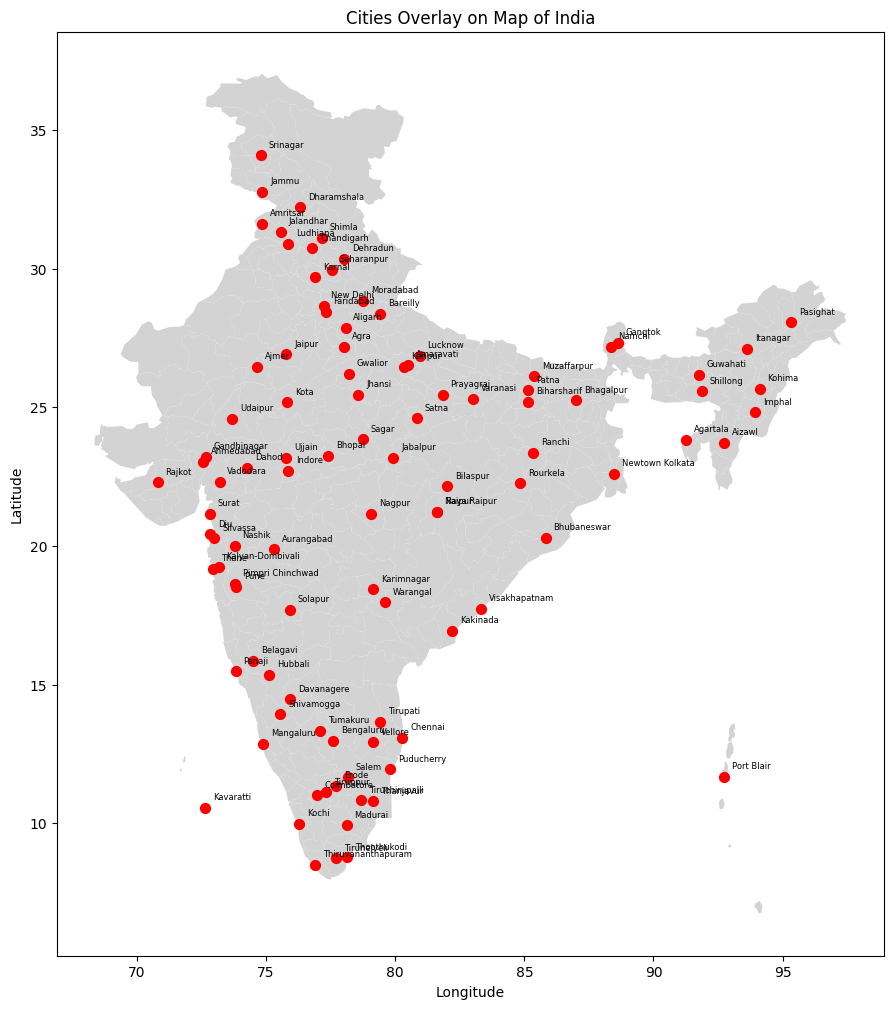

In [ ]:
import geopandas as gpd
import pandas as pd
import matplotlib.pyplot as plt
from shapely.geometry import Point

# Load the shapefile
india_map = gpd.read_file('/content/drive/MyDrive/Work @Weclimb/Smart cities work/India Shape/india_ds.shp')

# Load city data from Excel
excel_file = '/content/drive/MyDrive/Work @Weclimb/Smart cities work/smart cities list/grids.xlsx'  # Replace with your file path
cities_df = pd.read_excel(excel_file)

# Ensure the Excel file has columns: 'City', 'Longitude', 'Latitude'

# Convert to GeoDataFrame
cities_gdf = gpd.GeoDataFrame(
    cities_df,
    geometry=gpd.points_from_xy(cities_df['Longitude'], cities_df['Latitude']),
    crs='EPSG:4326'
)

# Plotting
fig, ax = plt.subplots(figsize=(12, 12))
india_map.plot(ax=ax, color='lightgray')
cities_gdf.plot(ax=ax, color='red', markersize=50)

# Add city labels
for x, y, label in zip(cities_gdf.geometry.x, cities_gdf.geometry.y, cities_gdf['City']):
    ax.text(x + 0.3, y + 0.3, label, fontsize=6)

plt.title('Cities Overlay on Map of India')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


**Load the smart cities list**

In [ ]:

smart_cities = pd.read_excel('/content/drive/MyDrive/Work @Weclimb/Smart cities work/smart cities list/grids.xlsx')


In [ ]:
#Picking or sorting smart cities india from the whole india bounding region using nearest matching approach
city_utci_data = []

for index, city in smart_cities.iterrows():
    city_name = city['City']
    lon = city['Longitude']
    lat = city['Latitude']

    # (nearest matching)
    utci_city = combined_data['utci'].sel(lon=lon, lat=lat, method='nearest')

    # Convert to DataFrame
    city_data = utci_city.to_dataframe().reset_index()
    city_data['City'] = city_name

    city_utci_data.append(city_data)

# Combine
final_city_utci = pd.concat(city_utci_data, ignore_index=True)

print(final_city_utci.head(880000))

            time    lat    lon        utci         City
0     1950-01-31  20.25  85.75  294.622894  Bhubaneswar
1     1950-02-28  20.25  85.75  296.236481  Bhubaneswar
2     1950-03-31  20.25  85.75  299.911224  Bhubaneswar
3     1950-04-30  20.25  85.75  304.812408  Bhubaneswar
4     1950-05-31  20.25  85.75  306.605438  Bhubaneswar
...          ...    ...    ...         ...          ...
88795 2023-08-31  25.50  92.00  296.490173     Shillong
88796 2023-09-30  25.50  92.00  297.827393     Shillong
88797 2023-10-31  25.50  92.00  293.832062     Shillong
88798 2023-11-30  25.50  92.00  290.642029     Shillong
88799 2023-12-31  25.50  92.00  287.863922     Shillong

[88800 rows x 5 columns]


In [ ]:
# Kelvin to Celsius
final_city_utci['utci_celsius'] = final_city_utci['utci'] - 273.15

# Display
print(final_city_utci.head())


        time    lat    lon        utci         City  utci_celsius
0 1950-01-31  20.25  85.75  294.622894  Bhubaneswar     21.472900
1 1950-02-28  20.25  85.75  296.236481  Bhubaneswar     23.086487
2 1950-03-31  20.25  85.75  299.911224  Bhubaneswar     26.761230
3 1950-04-30  20.25  85.75  304.812408  Bhubaneswar     31.662415
4 1950-05-31  20.25  85.75  306.605438  Bhubaneswar     33.455444


In [ ]:
#Saving the file as excel format
final_city_utci.to_excel('utci_data_smart cities (1950-2023).xlsx', index=True)

#Plotting the annual cycle

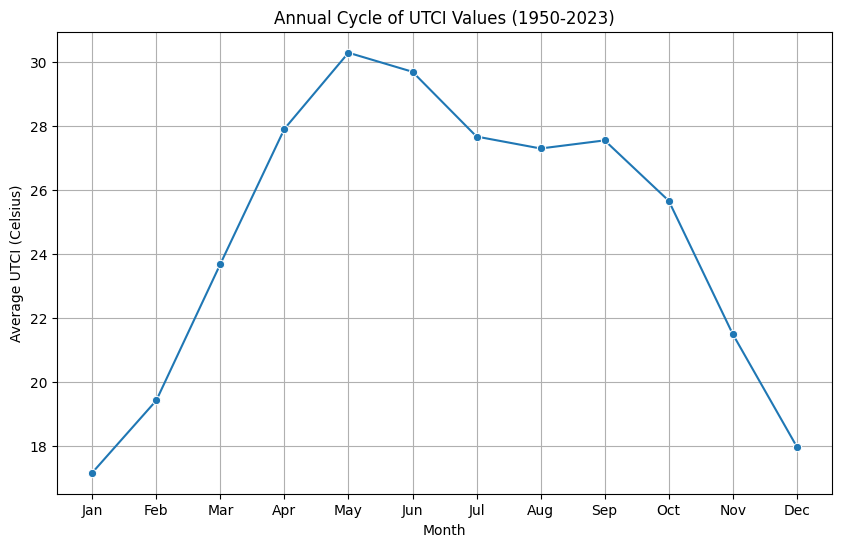

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


final_city_utci['time'] = pd.to_datetime(final_city_utci['time'])

# Extract month
final_city_utci['month'] = final_city_utci['time'].dt.month

# Calculate the average UTCI for each month across all years and cities
monthly_avg_utci = final_city_utci.groupby('month')['utci_celsius'].mean().reset_index()

# Create the plot
plt.figure(figsize=(10, 6))
sns.lineplot(x='month', y='utci_celsius', data=monthly_avg_utci, marker='o')
plt.title('Annual Cycle of UTCI Values (1950-2023)')
plt.xlabel('Month')
plt.ylabel('Average UTCI (Celsius)')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.grid(True)
plt.show()

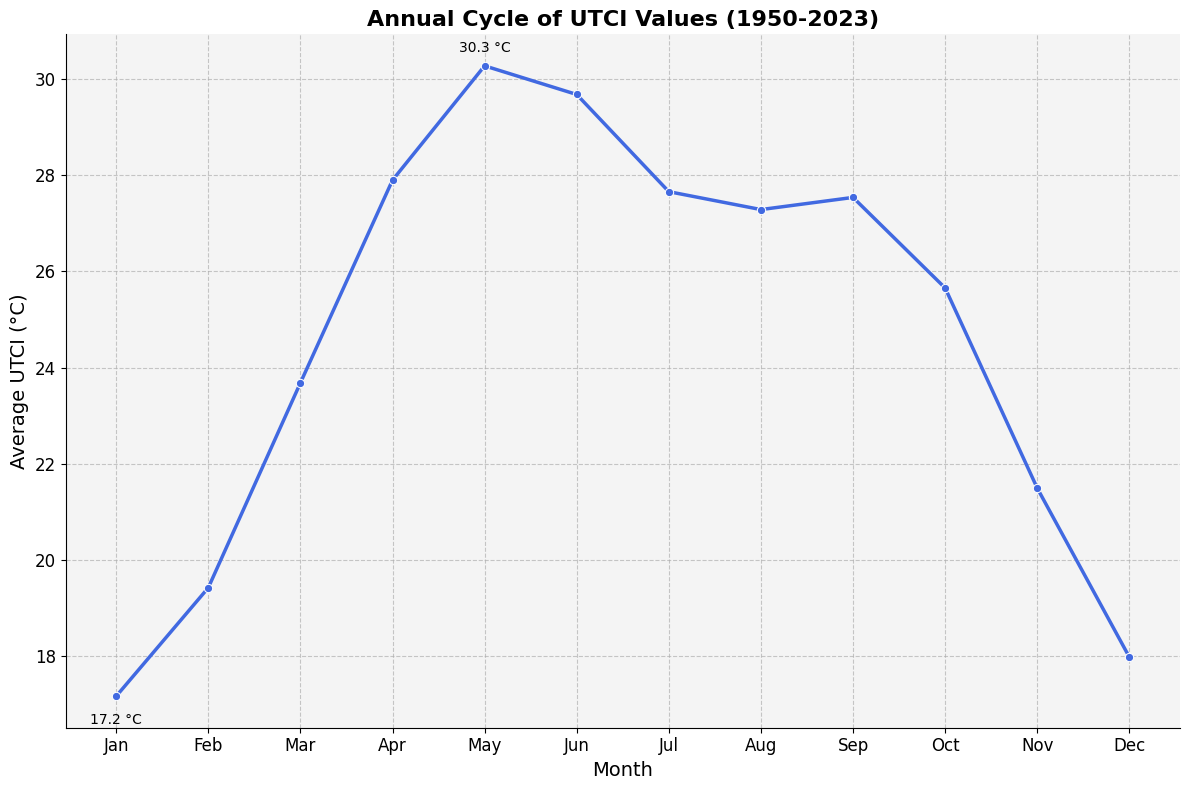

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


final_city_utci['time'] = pd.to_datetime(final_city_utci['time'])
final_city_utci['month'] = final_city_utci['time'].dt.month

# Calculate the average UTCI
monthly_avg_utci = final_city_utci.groupby('month')['utci_celsius'].mean().reset_index()

# Create the plot
plt.figure(figsize=(12, 8))
sns.lineplot(x='month', y='utci_celsius', data=monthly_avg_utci, marker='o',
             linewidth=2.5, color='royalblue')


plt.title('Annual Cycle of UTCI Values (1950-2023)', fontsize=16, fontweight='bold')
plt.xlabel('Month', fontsize=14)
plt.ylabel('Average UTCI (°C)', fontsize=14)
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'],
           fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)


plt.gca().set_facecolor('#f4f4f4')


sns.despine()

# min/max values
min_utci = monthly_avg_utci['utci_celsius'].min()
max_utci = monthly_avg_utci['utci_celsius'].max()
min_month = monthly_avg_utci.loc[monthly_avg_utci['utci_celsius'].idxmin(), 'month']
max_month = monthly_avg_utci.loc[monthly_avg_utci['utci_celsius'].idxmax(), 'month']

plt.annotate(f'{min_utci:.1f} °C', (min_month, min_utci), textcoords="offset points", xytext=(0, -20), ha='center')
plt.annotate(f'{max_utci:.1f} °C', (max_month, max_utci), textcoords="offset points", xytext=(0, 10), ha='center')

plt.tight_layout()
plt.show()

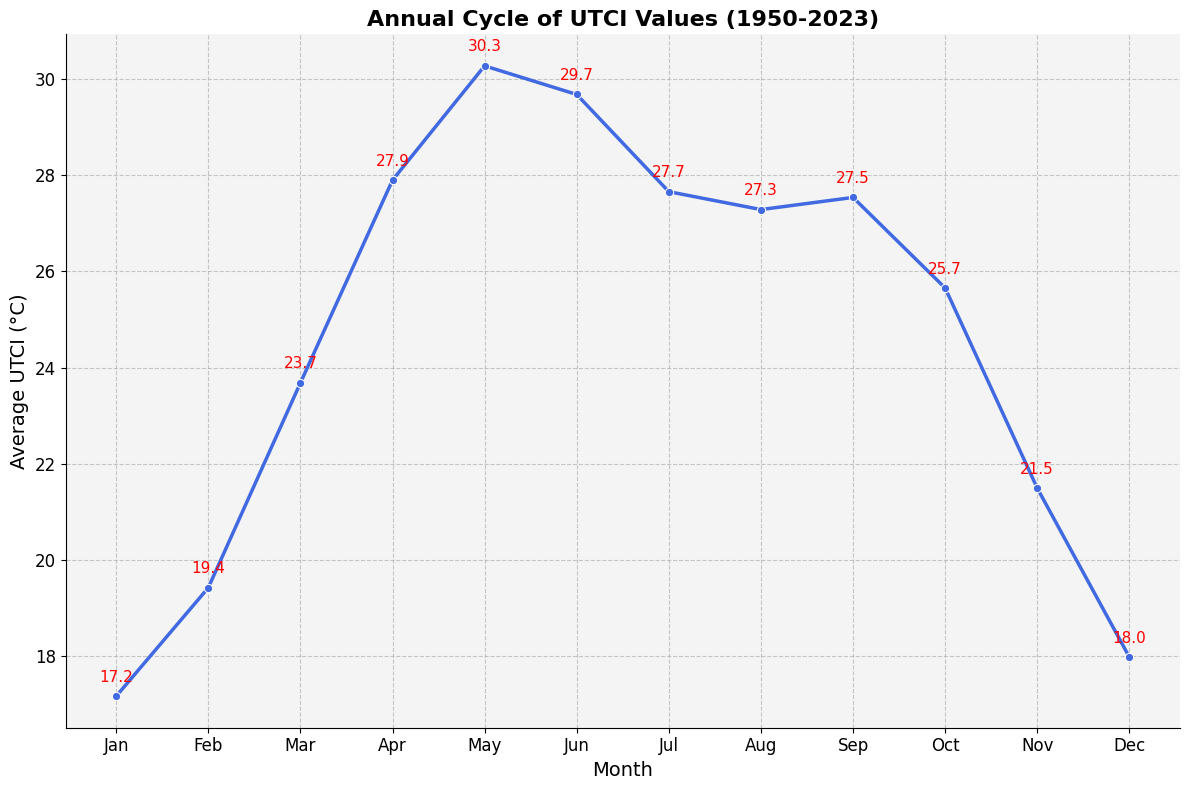

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns


final_city_utci['time'] = pd.to_datetime(final_city_utci['time'])
final_city_utci['month'] = final_city_utci['time'].dt.month

# Calculate the average UTCI
monthly_avg_utci = final_city_utci.groupby('month')['utci_celsius'].mean().reset_index()

# Create the plot
plt.figure(figsize=(12, 8))
sns.lineplot(x='month', y='utci_celsius', data=monthly_avg_utci, marker='o',
             linewidth=2.5, color='royalblue')


plt.title('Annual Cycle of UTCI Values (1950-2023)', fontsize=16, fontweight='bold')
plt.xlabel('Month', fontsize=14)
plt.ylabel('Average UTCI (°C)', fontsize=14)
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun',
                           'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.gca().set_facecolor('#f4f4f4')
sns.despine()

# Add value labels to each data point
for index, row in monthly_avg_utci.iterrows():
    plt.text(row['month'], row['utci_celsius'] + 0.3,
             f'{row["utci_celsius"]:.1f}',
             ha='center', fontsize=11, color='red')

# Add annotations for min/max values
min_utci = monthly_avg_utci['utci_celsius'].min()
max_utci = monthly_avg_utci['utci_celsius'].max()
min_month = monthly_avg_utci.loc[monthly_avg_utci['utci_celsius'].idxmin(), 'month']
max_month = monthly_avg_utci.loc[monthly_avg_utci['utci_celsius'].idxmax(), 'month']

#plt.annotate(f'{min_utci:.1f} °C', (min_month, min_utci),
             #textcoords="offset points", xytext=(0, -20), ha='center', fontsize=11, fontweight='bold')
#plt.annotate(f'{max_utci:.1f} °C', (max_month, max_utci),
             #textcoords="offset points", xytext=(0, 10), ha='center', fontsize=11, fontweight='bold')

plt.tight_layout()
plt.show()
